In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

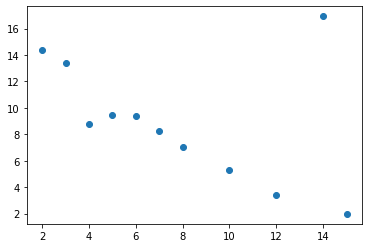

In [ ]:
x = np.array([2, 5, 8, 10, 14, 15, 4, 12, 3, 7, 6]) # x, y - парные наблюдения, x - регрессор - неслучайна и вычисляется без ошибок
y = np.array([14.39, 9.45, 7.05, 5.32, 16.94, 1.97, 8.75, 3.41, 13.37, 8.22, 9.39])
gamma = 0.9
n = len(x)
plt.scatter(x, y)

In [ ]:
sum = 0
for i in x:
  sum += i
x_mean = (1 / len(x)) * sum

sum = 0
for i in y:
  sum += i
y_mean = (1 / len(y)) * sum

print(f'Средние значения x и y соответственно: {x_mean, y_mean}')

Средние значения x и y соответственно: (7.818181818181818, 8.932727272727274)


## Подбор параметров линейной регрессионной зависимости.

Составление вспомогательной "таблицы":

In [ ]:
# Нахождение xi - x_mean
dif_x = []
for i in x:
  dif_x.append(i - x_mean)
dif_x = np.array(dif_x)

# Нахождение yi - y_mean
dif_y = []
for i in y:
  dif_y.append(i - y_mean)
dif_y = np.array(dif_y)

print(f'Значения xi - x_mean: {dif_x}')
print(f'Значения yi - y_mean: {dif_y}')

Значения xi - x_mean: [-5.81818182 -2.81818182  0.18181818  2.18181818  6.18181818  7.18181818
 -3.81818182  4.18181818 -4.81818182 -0.81818182 -1.81818182]
Значения yi - y_mean: [ 5.45727273  0.51727273 -1.88272727 -3.61272727  8.00727273 -6.96272727
 -0.18272727 -5.52272727  4.43727273 -0.71272727  0.45727273]


In [ ]:
# Нахождение (xi - x_mean)^2
dif_x_sqr = []
for i in x:
  dif_x_sqr.append((i - x_mean) ** 2)
dif_x_sqr = np.array(dif_x_sqr)

sum_dif_x_sqr = dif_x_sqr.sum()

print(f'Значения (xi - x_mean)^2: {dif_x_sqr}')
print(f'Сумма (xi - x_mean)^2: {sum_dif_x_sqr}')

Значения (xi - x_mean)^2: [3.38512397e+01 7.94214876e+00 3.30578512e-02 4.76033058e+00
 3.82148760e+01 5.15785124e+01 1.45785124e+01 1.74876033e+01
 2.32148760e+01 6.69421488e-01 3.30578512e+00]
Сумма (xi - x_mean)^2: 195.63636363636365


In [ ]:
# Нахождение (xi - x_mean)(yi - y_mean)
mult = []
for i in range(len(x)):
 mult.append((x[i] - x_mean) * (y[i] - y_mean))
mult = np.array(mult)

mult_sum = mult.sum()
print(f'Значения (xi - x_mean)*(yi - y_mean): {mult}')
print(f'Сумма (xi - x_mean)*(yi - y_mean): {mult_sum}')

Значения (xi - x_mean)*(yi - y_mean): [-31.75140496  -1.4577686   -0.34231405  -7.88231405  49.49950413
 -50.00504132   0.69768595 -23.09504132 -21.37958678   0.5831405
  -0.83140496]
Сумма (xi - x_mean)*(yi - y_mean): -85.96454545454544


In [ ]:
a_estim = y_mean
sum = 0

b_estim = mult_sum / sum_dif_x_sqr

print(f'Оценка параметра a: {a_estim}')
print(f'Оценка параметра b: {b_estim}')


Оценка параметра a: 8.932727272727274
Оценка параметра b: -0.43940985130111515


[11.489293680297397, 10.171064126394052, 8.852834572490707, 7.974014869888477, 6.216375464684017, 5.776965613382901, 10.610473977695168, 7.0951951672862466, 11.049883828996283, 9.292244423791823, 9.731654275092938]


Text(0.5, 1.0, 'Регрессионная зависимость')

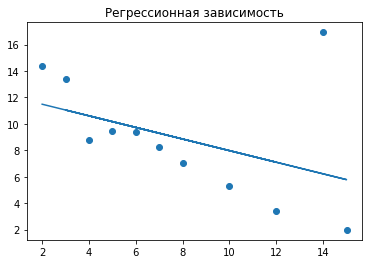

In [ ]:
# y_estim = a + b(x - x_mean)
y_estim = []
for i in x:
  y_estimi = a_estim + b_estim * (i - x_mean) # уравнение регрессии
  y_estim.append(y_estimi)
print(f'{y_estim}')  
plt.plot(x, y_estim)
plt.scatter(x, y)
plt.title('Регрессионная зависимость')

## Построение доверительных интервалов.

Перейдём к построению доверительных интервалов, задава $\beta$ = 0.9, $\alpha$ = 1 - $\beta$ = 0.1. Для получения оценок дисперсий параметров a и b вычислим D, заменив ее оценкой D.   

In [ ]:
dif_y_estim = []
for i in np.arange(11):
  c = y[i] - y_estim[i]
  dif_y_estim.append(c)
dif_y_estim = np.array(dif_y_estim) 

dif_y_estim_sqr = []
for i in np.arange(11):
  c = (y[i] - y_estim[i]) ** 2
  dif_y_estim_sqr.append(c)
dif_y_estim_sqr = np.array(dif_y_estim_sqr) 

dif_y_estim_sum = dif_y_estim.sum()
dif_y_estim_sqr_sum = dif_y_estim_sqr.sum()

print(f'Значения yi - yi_estim: {dif_y_estim}')
print(f'Значения (yi - yi_estim)^2: {dif_y_estim_sqr}')
print(f'Сумма значений yi - yi_estim: {dif_y_estim_sum}')
print(f'Сумма значений (yi - yi_estim)^2: {dif_y_estim_sqr_sum}')

Значения yi - yi_estim: [ 2.90070632 -0.72106413 -1.80283457 -2.65401487 10.72362454 -3.80696561
 -1.86047398 -3.68519517  2.32011617 -1.07224442 -0.34165428]
Значения (yi - yi_estim)^2: [  8.41409715   0.51993347   3.2502125    7.04379493 114.99612317
  14.49298718   3.46136342  13.58066342   5.38293905   1.1497081
   0.11672764]
Сумма значений yi - yi_estim: -7.105427357601002e-15
Сумма значений (yi - yi_estim)^2: 172.40855004646843


In [ ]:
D_estim = dif_y_estim_sqr_sum / 11
D_a = D_estim / 11 # Получение оценки дисперсии параметра a
D_b = D_estim / sum_dif_x_sqr # Получение оценки дисперсии параметра b
D_y = []
for i in range(n):
  D_yi = D_estim * ((1 / n) + ((x[i] - x_mean) ** 2) / sum_dif_x_sqr)
  D_y.append(D_yi)
D_y = np.array(D_y)
print(f'Оценка дисперсии D: {D_estim}')
print(f'Дисперсия оценки D(a): {D_a}')
print(f'Дисперсия оценки D(b): {D_b}')
print(f'Дисперсия D(y) в точке x: {D_y}')

Оценка дисперсии D: 15.673504549678949
Дисперсия оценки D(a): 1.4248640499708136
Дисперсия оценки D(b): 0.08011549723348904
Дисперсия D(y) в точке x: [4.13687295 2.06115325 1.4275125  1.8062403  4.48646785 5.55710222
 2.59282882 2.82589208 3.28473539 1.47849509 1.68970867]


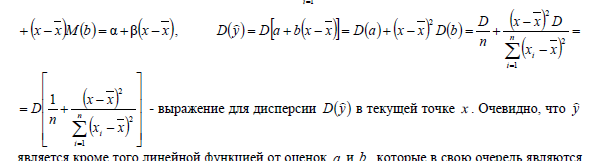

In [ ]:
t = 2.2622 # По таблице распределения Сьюдента для n = 9

E_a = t * math.sqrt(D_estim / 9) # Численное значение интервала для параметра a
upper_bound_a = a_estim + E_a # нижняя граница
lower_bound_a = a_estim - E_a # верхняя граница

E_b =  t * math.sqrt((11 / 9) * (D_estim / sum_dif_x_sqr))
upper_bound_b = b_estim + E_b
lower_bound_b = b_estim - E_b

E_y = []
for i in range(n):
  E_yi = t * math.sqrt(D_estim / (n - 2)) * math.sqrt(1 + n * (x[i] - x_mean) / sum_dif_x_sqr)
  E_y.append(E_yi)

E_y = np.array(E_y)

upper_bound_y = []
lower_bound_y = []
for i in range(n):
  up = y_estim[i] + E_y[i]
  lb = y_estim[i] - E_y[i]
  upper_bound_y.append(up)
  lower_bound_y.append(lb)

upper_bound_y = np.array(upper_bound_y)
lower_bound_y = np.array(lower_bound_y)

print(f'Доверительный интервал для a: {lower_bound_a, upper_bound_a}')
print(f'Доверительный интервал для b: {lower_bound_b, upper_bound_b}')
print(f'Отклонение для значения y: {E_y}')
print(f'Нижнии границы оценки y: {lower_bound_y}')
print(f'Верхнии границы оценки y: {upper_bound_y}')

Доверительный интервал для a: (5.947394143597009, 11.918060401857538)
Доверительный интервал для b: (-1.1472975283034546, 0.2684778257012243)
Отклонение для значения y: [2.44881484 2.73861443 3.00055393 3.16315251 3.46553801 3.53709749
 2.64554418 3.317792   2.54907808 2.91585646 2.82862404]
Нижнии границы оценки y: [9.04047884 7.4324497  5.85228064 4.81086236 2.75083746 2.23986813
 7.96492979 3.77740317 8.50080575 6.37638796 6.90303024]
Верхнии границы оценки y: [13.93810852 12.90967856 11.8533885  11.13716738  9.68191347  9.3140631
 13.25601816 10.41298716 13.59896191 12.20810089 12.56027831]


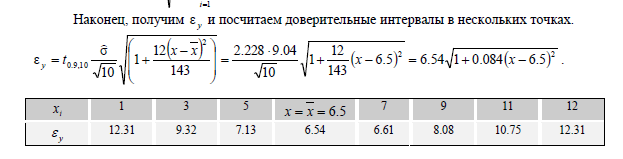

Text(0, 0.5, 'Y')

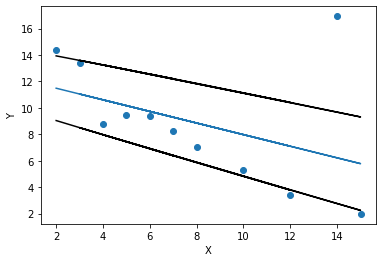

In [ ]:
plt.plot(x, y_estim)
plt.plot(x, lower_bound_y, color='black')
plt.plot(x, upper_bound_y, color='black')
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')

## Проверка адекватности линейной регрессии 

In [ ]:
print(f'Сумма (xi - x_mean)^2: {sum_dif_x_sqr}')
print(f'Сумма значений (yi - yi_estim)^2: {dif_y_estim_sqr_sum}')
print(f'Оценка параметра b: {b_estim}')

F = 3.36030 # из таблицы критическое значение F - распределения
D = dif_y_estim_sqr_sum / (n - 2) # несмещенная оценка дисперсии ошибок наблюдений
z = b_estim ** 2 * sum_dif_x_sqr / D
print(f'Несмещенная оценка дисперсии оишбок наблюдений: {D}')
print(f'Критическое значение статистики: {F}')
print(f'Полученное значение статистики: {z}')
print(f'Гипотеза H0 принимается для заданного уровня a')

Сумма (xi - x_mean)^2: 195.63636363636365
Сумма значений (yi - yi_estim)^2: 172.40855004646843
Оценка параметра b: -0.43940985130111515
Несмещенная оценка дисперсии оишбок наблюдений: 19.156505560718713
Критическое значение статистики: 3.3603
Полученное значение статистики: 1.9718454399536411
Гипотеза H0 принимается для заданного уровня a


Расчёт среднеквадратичной ошибки:

In [ ]:
n = 11
dif_y_estim_sqr = np.array(dif_y_estim_sqr)
sum = dif_y_estim_sqr.sum()
MSE = sum / n
MSE

15.673504549678949

Расчёт средней абсолютной ошибки:

In [ ]:
dif_y_estim = []
for i in np.arange(11):
  c = abs(y[i] - y_estim[i])
  dif_y_estim.append(c)

dif_y_estim = np.array(dif_y_estim)
sum = dif_y_estim.sum()
MAE = sum / n
MAE

2.898990368367692